In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

In [215]:
df=pd.read_csv("D:/sales_data.csv")
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


Data exploration


In [4]:
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [4]:
df.tail(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84
75999,2024-01-30,S005,P0020,Toys,North,126,63,59,25.78,10,Snowy,0,29.32,Winter,0,73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [6]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [5]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.drop_duplicates().sum()

Date                  2022-01-012022-01-012022-01-012022-01-012022-0...
Store ID              S001S001S001S001S001S001S001S001S001S001S001S0...
Product ID            P0001P0002P0003P0004P0005P0006P0007P0008P0009P...
Category              ElectronicsClothingClothingElectronicsGrocerie...
Region                NorthNorthNorthNorthNorthNorthNorthNorthNorthN...
Inventory Level                                                22880776
Units Sold                                                      6750876
Units Ordered                                                   6770889
Price                                                        5147178.09
Discount                                                         690615
Weather Condition     SnowySnowySnowySnowySnowySnowySnowySnowySnowyS...
Promotion                                                         25000
Competitor Pricing                                           5278506.21
Seasonality           WinterWinterWinterWinterWinterWinterWinter

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [13]:
df["Seasonality"].value_counts()

Seasonality
Winter    21000
Spring    18400
Summer    18400
Autumn    18200
Name: count, dtype: int64

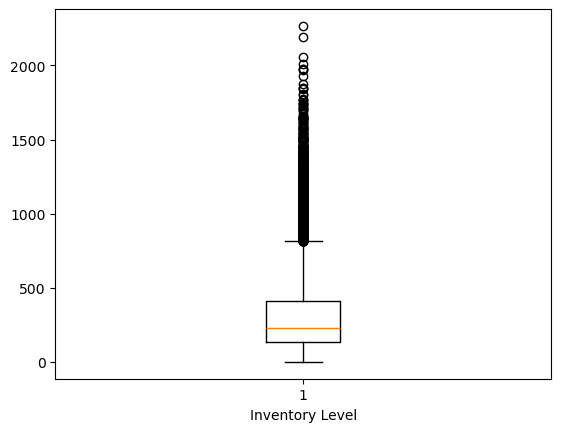

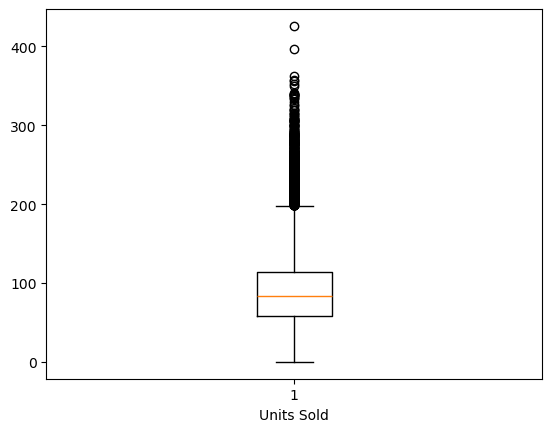

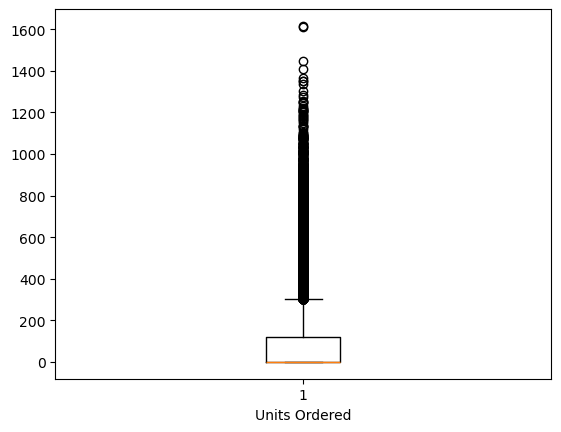

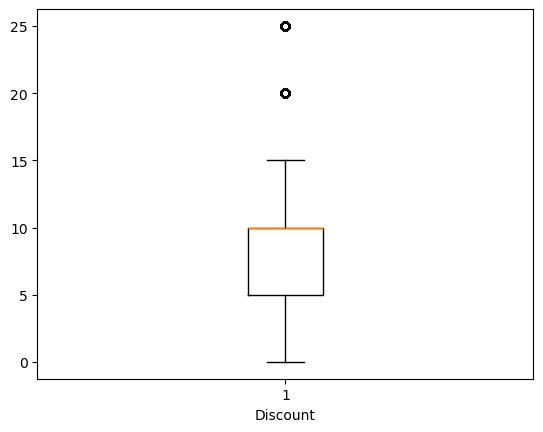

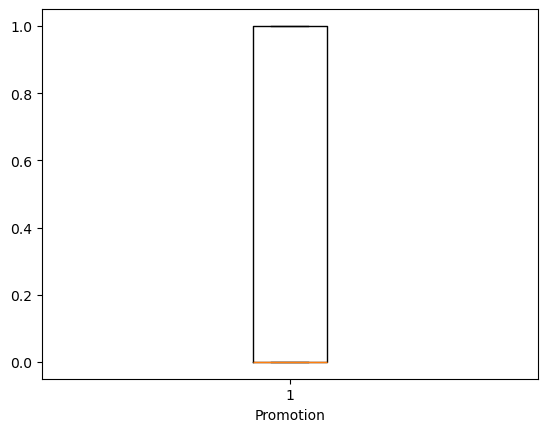

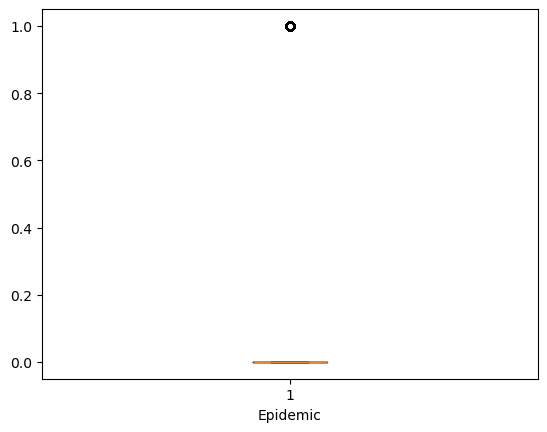

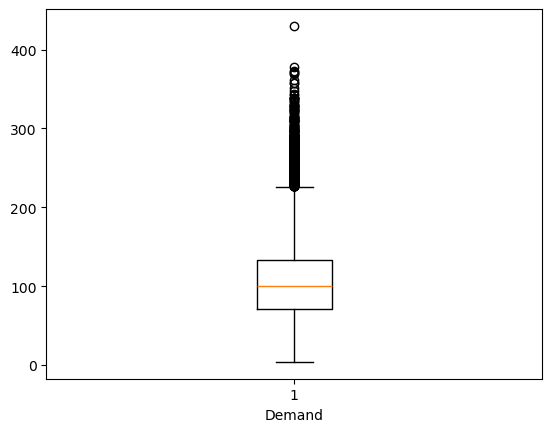

In [25]:
for i in df.columns:
    if((df[i].dtypes!="object64")&(df[i].dtypes=="int64")):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [20]:
df.shape

(76000, 16)

In [26]:
df["Category"].value_counts()

Category
Groceries      30400
Furniture      13680
Clothing       12160
Toys           10640
Electronics     9120
Name: count, dtype: int64

In [27]:
df["Promotion"].value_counts()

Promotion
0    51000
1    25000
Name: count, dtype: int64

In [28]:
df["Store ID"].value_counts()

Store ID
S001    15200
S002    15200
S003    15200
S004    15200
S005    15200
Name: count, dtype: int64

In [29]:
df["Region"].value_counts()

Region
North    30400
South    15200
East     15200
West     15200
Name: count, dtype: int64

In [45]:
df["Category"]=df["Category"].fillna(1)

In [46]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [216]:
q1=df["Inventory Level"].quantile(0.25)
q3=df["Inventory Level"].quantile(0.75)
q2=q3-q1
df=df[(df["Inventory Level"]>=q1)&(df["Inventory Level"]<=q3)]

In [14]:
le=LabelEncoder()

In [217]:
df["Date"].value_counts()

Date
2022-01-01    77
2022-12-05    67
2022-01-11    65
2023-11-04    65
2023-11-10    65
              ..
2023-10-18    37
2022-06-30    37
2023-11-18    37
2022-04-22    35
2022-07-01    34
Name: count, Length: 760, dtype: int64

In [234]:
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype(int)
df['day_of_week'] = df['Date'].dt.dayofweek
df['year'] = df['Date'].dt.year

C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\2901360553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month
C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\2901360553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['Date'].dt.isocalendar().week.astype(int)
C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\2901360553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Visualization

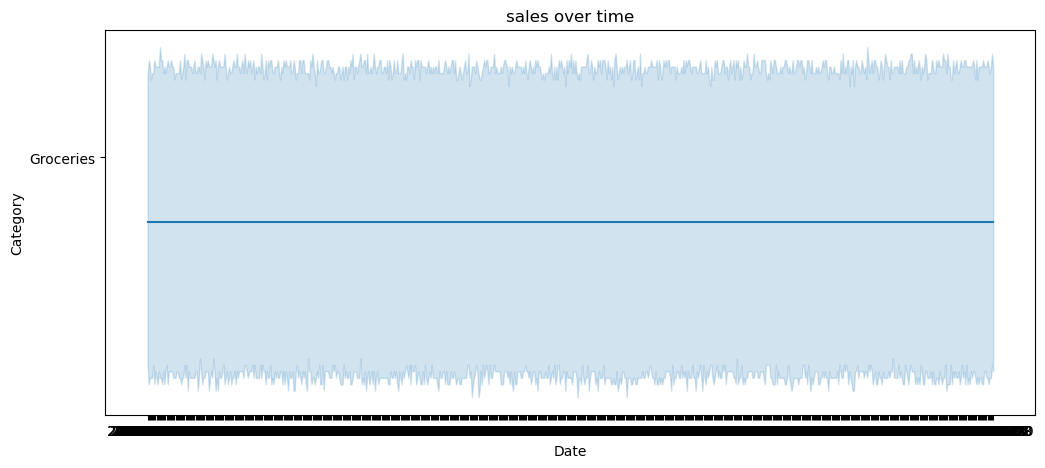

In [194]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Category",data=df)
plt.title("sales over time")
plt.show()

In [179]:
df=df.set_index("Date")
y=df["Category"]

In [180]:
y

Date
2022-01-01    Electronics
2022-01-01       Clothing
2022-01-01       Clothing
2022-01-01    Electronics
2022-01-01      Groceries
                 ...     
2024-01-30           Toys
2024-01-30           Toys
2024-01-30       Clothing
2024-01-30      Furniture
2024-01-30           Toys
Name: Category, Length: 76000, dtype: object

In [177]:
train=y.iloc[:-30]
test=y.iloc[-30:]

In [123]:
test

Date
2024-01-29    Electronics
2024-01-29           Toys
2024-01-29      Groceries
2024-01-29      Groceries
2024-01-29      Furniture
2024-01-29      Groceries
2024-01-29           Toys
2024-01-30    Electronics
2024-01-30      Furniture
2024-01-30      Groceries
2024-01-30           Toys
2024-01-30           Toys
2024-01-30           Toys
2024-01-30      Groceries
2024-01-30      Furniture
2024-01-30      Furniture
2024-01-30      Groceries
2024-01-30       Clothing
2024-01-30      Groceries
2024-01-30    Electronics
2024-01-30      Furniture
2024-01-30       Clothing
2024-01-30      Groceries
2024-01-30           Toys
2024-01-30      Groceries
2024-01-30      Groceries
2024-01-30      Groceries
2024-01-30    Electronics
2024-01-30           Toys
2024-01-30       Clothing
Name: Category, dtype: object

In [231]:
train

,Date,Demand
0,2022-01-01,7407
1,2022-01-02,4361
2,2022-01-03,4312
3,2022-01-04,5729
4,2022-01-05,6766
...,...,...
725,2023-12-27,3865
726,2023-12-28,2717
727,2023-12-29,3997
728,2023-12-30,2331


In [232]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [220]:
daily_df = df.groupby("Date")["Demand"].sum().reset_index()

train-test split

In [221]:
train = daily_df.iloc[:-30]# last 30 days for testing
test = daily_df.iloc[-30:]

In [222]:
arima_model = ARIMA(train["Demand"], order=(5,1,2))

In [223]:
arima_model

In [224]:
arima_model = ARIMA(train["Demand"], order=(5,1,2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

In [225]:
arima_result

In [226]:
arima_forecast

730    3525.606119
731    3782.153705
732    3750.697421
733    3713.255573
734    3551.169002
735    3555.926925
736    3527.847373
737    3580.727344
738    3579.903376
739    3602.892571
740    3585.951594
741    3590.515929
742    3578.263008
743    3584.247608
744    3580.109271
745    3585.615897
746    3582.989476
747    3585.614123
748    3583.233538
749    3584.599416
750    3583.187602
751    3584.245739
752    3583.504197
753    3584.205731
754    3583.708882
755    3584.103193
756    3583.764806
757    3584.008971
758    3583.806032
759    3583.969036
Name: predicted_mean, dtype: float64

 PROPHET MODEL

In [146]:
prophet_df = train.rename(columns={"Date": "ds", "Demand": "y"})

In [147]:
prophet_model = Prophet()

In [148]:
prophet_model.fit(prophet_df)

21:12:28 - cmdstanpy - INFO - Chain [1] start processing
21:12:29 - cmdstanpy - INFO - Chain [1] done processing


In [227]:
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future).iloc[-len(test):]

In [228]:
future

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
755,2024-01-26
756,2024-01-27
757,2024-01-28
758,2024-01-29


In [151]:
prophet_forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
730,2024-01-01,10493.785590,8136.746483,12821.764419,10493.785590,10493.785590,-68.429708,-68.429708,-68.429708,-68.429708,-68.429708,-68.429708,0.0,0.0,0.0,10425.355883
731,2024-01-02,10494.037036,8011.757511,12899.545566,10494.037036,10494.037036,-42.846161,-42.846161,-42.846161,-42.846161,-42.846161,-42.846161,0.0,0.0,0.0,10451.190876
732,2024-01-03,10494.288482,8181.284914,12966.246732,10494.288482,10494.288482,95.366998,95.366998,95.366998,95.366998,95.366998,95.366998,0.0,0.0,0.0,10589.655480
733,2024-01-04,10494.539928,8046.432023,12803.219975,10494.539928,10494.539928,-6.738305,-6.738305,-6.738305,-6.738305,-6.738305,-6.738305,0.0,0.0,0.0,10487.801622
734,2024-01-05,10494.791373,8203.015765,13103.506705,10494.791373,10494.791373,14.430697,14.430697,14.430697,14.430697,14.430697,14.430697,0.0,0.0,0.0,10509.222070
735,2024-01-06,10495.042819,8072.547633,12897.671109,10495.031713,10495.042819,-27.462391,-27.462391,-27.462391,-27.462391,-27.462391,-27.462391,0.0,0.0,0.0,10467.580428
736,2024-01-07,10495.294265,8187.854827,13000.211412,10495.258056,10495.294265,35.678871,35.678871,35.678871,35.678871,35.678871,35.678871,0.0,0.0,0.0,10530.973136
737,2024-01-08,10495.545711,7956.386586,13005.710578,10495.474019,10495.585964,-68.429708,-68.429708,-68.429708,-68.429708,-68.429708,-68.429708,0.0,0.0,0.0,10427.116003
738,2024-01-09,10495.797156,7986.430168,12939.685260,10495.659303,10495.900569,-42.846161,-42.846161,-42.846161,-42.846161,-42.846161,-42.846161,0.0,0.0,0.0,10452.950996
739,2024-01-10,10496.048602,8158.560311,12991.412670,10495.837592,10496.210304,95.366998,95.366998,95.366998,95.366998,95.366998,95.366998,0.0,0.0,0.0,10591.415600


EVALUATION FUNCTION

In [230]:
def evaluate(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"{label} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    return mae, rmse, mape
evaluate(test["Demand"].values, arima_forecast.values, "ARIMA")
evaluate(test["Demand"].values, prophet_forecast['yhat'].values, "Prophet")

ARIMA -> MAE: 1587.53, RMSE: 1825.36, MAPE: 28.80%
Prophet -> MAE: 5450.29, RMSE: 5557.60, MAPE: 119.96%


(5450.289024808535, 5557.601501516597, 119.9636239598987)

Plot predictions

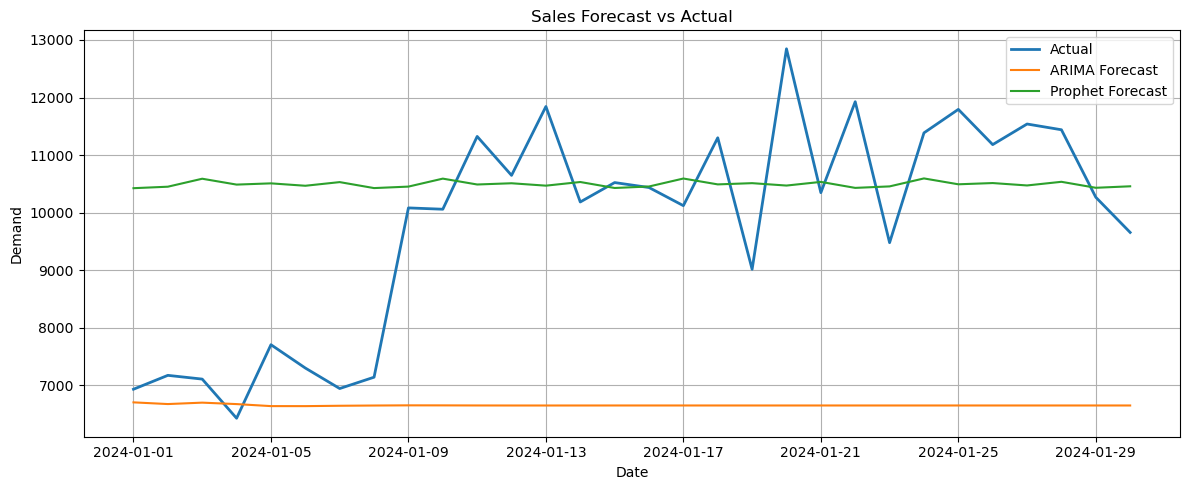

In [162]:
plt.figure(figsize=(12,5))
x = test["Date"]

plt.plot(x, test["Demand"], label='Actual', linewidth=2)
plt.plot(x, arima_forecast.values, label='ARIMA Forecast')
plt.plot(x, prophet_forecast['yhat'].values, label='Prophet Forecast')
plt.legend()
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

Actionable insights
Calculate stockout/overstock days hypothetically

In [164]:
test_demand = test["Demand"]
target_inventory = test_demand.mean()
stockouts = (test_demand < 0.8 * target_inventory).sum()
overstock = (test_demand > 1.2 * target_inventory).sum()

print(f"Stockouts: {stockouts} days, Overstock: {overstock} days")

Stockouts: 8 days, Overstock: 4 days


convert into all object into int32

In [236]:
Le=LabelEncoder()

In [237]:
col_list=df.select_dtypes(include="object")
for i in df.columns:
    df[i]=Le.fit_transform(df[i])

C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\744769968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=Le.fit_transform(df[i])
C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\744769968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=Le.fit_transform(df[i])
C:\Users\prajw\AppData\Local\Temp\ipykernel_4020\744769968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [238]:
df.head(2)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,month,week,day_of_week,year
0,0,0,0,1,1,59,100,202,6294,1,2,0,7481,3,0,111,0,51,5,0
2,0,0,2,0,1,111,112,559,5348,2,2,1,5036,3,0,153,0,51,5,0


train_test_split

In [239]:
x=df[["Store ID","Product ID","Region","Units Sold","Units Ordered"]]
y=df["Price"]

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [241]:
y_train

71526     2158
44798    12293
48905     2085
1099      2597
23468    10584
         ...  
12490     6206
22712     2320
75911     7325
1651      7151
31689     4189
Name: Price, Length: 30564, dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                76000 non-null  int32
 1   Store ID            76000 non-null  int32
 2   Product ID          76000 non-null  int32
 3   Category            76000 non-null  int32
 4   Region              76000 non-null  int32
 5   Inventory Level     76000 non-null  int64
 6   Units Sold          76000 non-null  int64
 7   Units Ordered       76000 non-null  int64
 8   Price               76000 non-null  int64
 9   Discount            76000 non-null  int64
 10  Weather Condition   76000 non-null  int32
 11  Promotion           76000 non-null  int64
 12  Competitor Pricing  76000 non-null  int64
 13  Seasonality         76000 non-null  int32
 14  Epidemic            76000 non-null  int64
 15  Demand              76000 non-null  int64
dtypes: int32(7), int64(9)
memory usage: 7.2 

In [203]:
from sklearn.linear_model import LinearRegression

In [206]:
Le=LinearRegression()

In [207]:
model=Le.fit(x_train,y_train)
model

LinearRegression()

In [208]:
y1=Le.predict(x_test)
y1

array([7150.71557145, 6614.7421956 , 7280.30606589, ..., 6155.66392106,
       7917.79420978, 7988.3563964 ])

In [210]:
df1=pd.DataFrame()
df1["Actual_price"]=y_test
df1["predicted_Price"]=y1
df1

,Actual_price,predicted_Price
53731,6611,7150.715571
61112,2401,6614.742196
72074,6925,7280.306066
56928,6718,6201.267257
20979,13411,8313.075105
...,...,...
44505,4227,5648.977032
21165,3146,5354.298366
11310,13486,6155.663921
48677,12344,7917.794210


In [211]:
from sklearn.metrics import r2_score

In [212]:
print(r2_score(y_test,y1)*100)

10.21081536948466
